# Praktikum Machine Learning Pertemuan 2


---


Yusuf Zaenul Mustofa \
24060122120021 \
C1 \


---




## I. Melakukan Clustering Menggunakan Dataset Iris

### Import Dataset

Import library

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

Memuat dataset iris

In [115]:
iris = load_iris()
features = iris.data.T

Memilih fitur ke 2 dan ke 3

In [116]:
X = np.array(list(zip(features[1], features[2])))

Visualisasi data

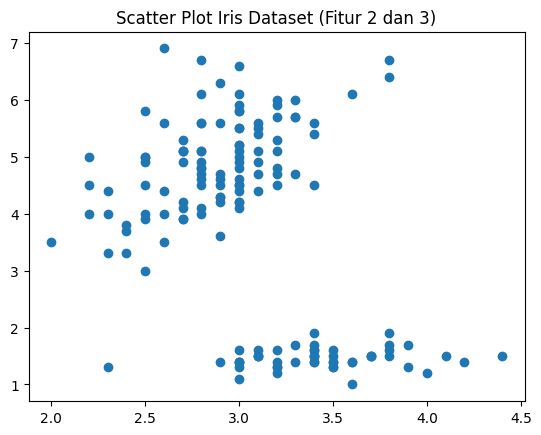

In [117]:
plt.scatter(features[1], features[2])
plt.title("Scatter Plot Iris Dataset (Fitur 2 dan 3)")
plt.show()

### Melakukan Clustering

Mengelompokkan data ke dalam 3 cluster menggunakan KMeans Clustering

In [118]:
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
# Fitting input data
kmeans = kmeans.fit(X)
# Mendapatkan cluster labels
labels = kmeans.predict(X)
# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
# Mencetak nilai centroid
print(C)

[[3.428      1.462     ]
 [3.03255814 5.67209302]
 [2.75087719 4.32807018]]


### Melakukan Plot Clustering

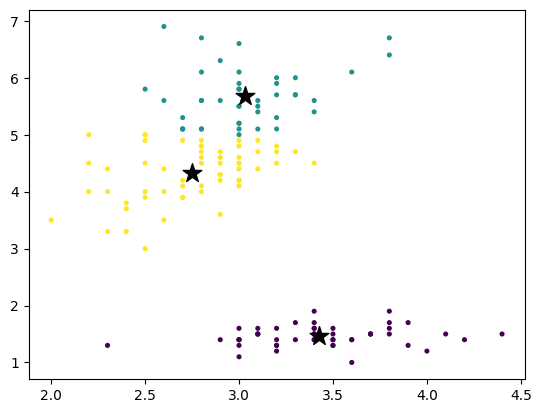

In [119]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=7)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## II. Melakukan Evaluasi Hasil Clustering

### Menghitung Inertia (SSE)

In [120]:
for k in range (1,10):
  # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster labels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak anrara setiap sampel dengan cluster centroidnya (SSE)
  inertia = kmeans.inertia_
  print("k:",k, "cost:",inertia)

k: 1 cost: 492.6323333333334
k: 2 cost: 86.31064765300054
k: 3 cost: 40.73707409220729
k: 4 cost: 27.57402222222222
k: 5 cost: 23.759754764553204
k: 6 cost: 20.448378138528128
k: 7 cost: 16.282159090909094
k: 8 cost: 16.834071114055792
k: 9 cost: 15.983369359669824


### Menghitung Silhouette Coefficient

In [121]:
silhouette_score(X, labels)

0.3430730545265206

## Menentukan K dengan Elbow Method

Mencari jumlah kluster optimal dalam K-Means menggunakan Elbow Method dengan menghitung SSE untuk setiap jumlah kluster.

In [122]:
X = np.array(list(zip(features[1], features[2]))).reshape(len(features[1]), 2)
SSE = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    SSE.append(kmeanModel.inertia_)

Plot hasil perhitungan Elbow Method

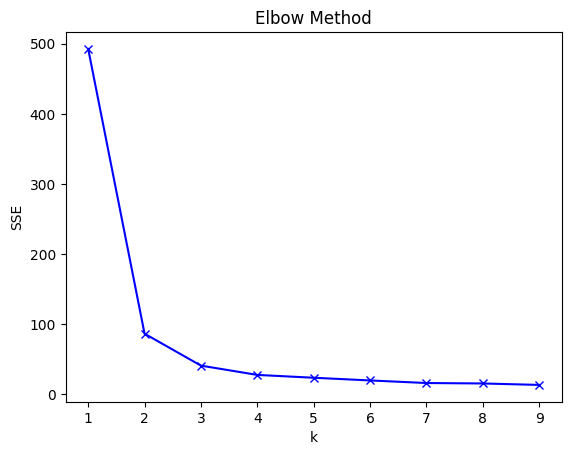

In [123]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

Jumlah cluster yang optimal adalah 3, berdasarkan metode Elbow. Penurunan inersia signifikan terjadi dari k=1 ke k=2 dan k=2 ke k=3, namun setelah k=3, penurunan melambat dan menjadi tidak signifikan, menunjukkan elbow point berada di k=3.

## IV. Plot Hasil Cluster dengan K bernilai 3

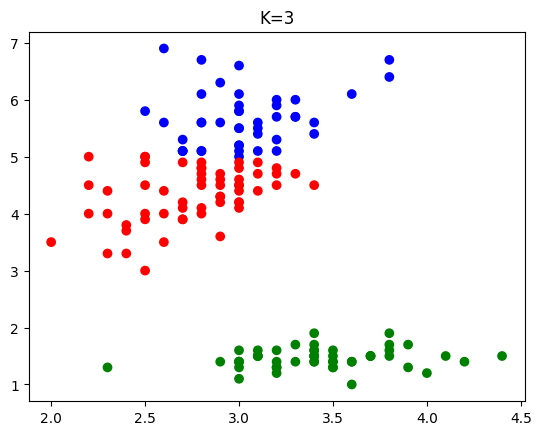

In [124]:
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.plot()
LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features[1], features[2], c=label_color)
plt.title('K=3')
plt.show()